In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader


import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
import torchvision
import torchvision.transforms as transforms

transforms = 전처리하기위해  
Compose = 여러 전처리를 한 번에 모아주는 역할  
CenterCrop() : 이미지에서 중간부분을 잘라주는 역할
ToTensor() : PIL 이나 numpy array (Height x Width x Channel) 그리고 픽셀값이 [0, 255] 인 이미지를 (Channel x Height x Width) 그리고 픽셀값 [0.0 , 1.0] 으로 변환

In [4]:
transform = transforms.Compose([  transforms.CenterCrop(10),
                            transforms.ToTensor(),
                                transforms.Normalize(
                                mean=(0.5, 0.5, 0.5), std=(0.5,0.5,0.5))
])

CIFAR10 이미지 다운로드

In [5]:
transform = transforms.Compose([ transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5),
                              (0.5,0.5,0.5)
                                                  )])

trainset = torchvision.datasets.CIFAR10(root='./data',
                                       train=True,
                                       download=True,
                                       transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data',
                                      train=False,
                                      download=True,
                                      transform=transform)

100%|███████████████████████████████████████████████████████████████▉| 170483712/170498071 [13:16<00:00, 265216.16it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


- num_workers = cpu process를 몇개 사용할 것이냐

In [6]:
trainloader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=8, shuffle=True, num_workers=2)

#### np.transpose = ToTensor에서 (C x H x W) 였던것을 (H x W x C) 로 바꾸어줌  
why? numpy에 맞는 채널순서를 해주어야 제대로 된 이미지가 나오기 때문에

In [11]:
def imshow(image):
    image = image / 2 + 0.5   #un normarlize
    np_image = image.numpy()
    
    plt.imshow(np.transpose(np_image, (1,2,0)))
    
    print(np_image.shape)
    print(np.transpose(np_image, (1,2,0)).shape)

In [9]:
data_iter = iter(trainloader)
images, labels = data_iter.next()

In [11]:
for n, (image, labels) in enumerate(trainloader):
    print(n, image.shape, labels.shape)

0 torch.Size([8, 3, 32, 32]) torch.Size([8])
1 torch.Size([8, 3, 32, 32]) torch.Size([8])
2 torch.Size([8, 3, 32, 32]) torch.Size([8])
3 torch.Size([8, 3, 32, 32]) torch.Size([8])
4 torch.Size([8, 3, 32, 32]) torch.Size([8])
5 torch.Size([8, 3, 32, 32]) torch.Size([8])
6 torch.Size([8, 3, 32, 32]) torch.Size([8])
7 torch.Size([8, 3, 32, 32]) torch.Size([8])
8 torch.Size([8, 3, 32, 32]) torch.Size([8])
9 torch.Size([8, 3, 32, 32]) torch.Size([8])
10 torch.Size([8, 3, 32, 32]) torch.Size([8])
11 torch.Size([8, 3, 32, 32]) torch.Size([8])
12 torch.Size([8, 3, 32, 32]) torch.Size([8])
13 torch.Size([8, 3, 32, 32]) torch.Size([8])
14 torch.Size([8, 3, 32, 32]) torch.Size([8])
15 torch.Size([8, 3, 32, 32]) torch.Size([8])
16 torch.Size([8, 3, 32, 32]) torch.Size([8])
17 torch.Size([8, 3, 32, 32]) torch.Size([8])
18 torch.Size([8, 3, 32, 32]) torch.Size([8])
19 torch.Size([8, 3, 32, 32]) torch.Size([8])
20 torch.Size([8, 3, 32, 32]) torch.Size([8])
21 torch.Size([8, 3, 32, 32]) torch.Size([8]

176 torch.Size([8, 3, 32, 32]) torch.Size([8])
177 torch.Size([8, 3, 32, 32]) torch.Size([8])
178 torch.Size([8, 3, 32, 32]) torch.Size([8])
179 torch.Size([8, 3, 32, 32]) torch.Size([8])
180 torch.Size([8, 3, 32, 32]) torch.Size([8])
181 torch.Size([8, 3, 32, 32]) torch.Size([8])
182 torch.Size([8, 3, 32, 32]) torch.Size([8])
183 torch.Size([8, 3, 32, 32]) torch.Size([8])
184 torch.Size([8, 3, 32, 32]) torch.Size([8])
185 torch.Size([8, 3, 32, 32]) torch.Size([8])
186 torch.Size([8, 3, 32, 32]) torch.Size([8])
187 torch.Size([8, 3, 32, 32]) torch.Size([8])
188 torch.Size([8, 3, 32, 32]) torch.Size([8])
189 torch.Size([8, 3, 32, 32]) torch.Size([8])
190 torch.Size([8, 3, 32, 32]) torch.Size([8])
191 torch.Size([8, 3, 32, 32]) torch.Size([8])
192 torch.Size([8, 3, 32, 32]) torch.Size([8])
193 torch.Size([8, 3, 32, 32]) torch.Size([8])
194 torch.Size([8, 3, 32, 32]) torch.Size([8])
195 torch.Size([8, 3, 32, 32]) torch.Size([8])
196 torch.Size([8, 3, 32, 32]) torch.Size([8])
197 torch.Siz

350 torch.Size([8, 3, 32, 32]) torch.Size([8])
351 torch.Size([8, 3, 32, 32]) torch.Size([8])
352 torch.Size([8, 3, 32, 32]) torch.Size([8])
353 torch.Size([8, 3, 32, 32]) torch.Size([8])
354 torch.Size([8, 3, 32, 32]) torch.Size([8])
355 torch.Size([8, 3, 32, 32]) torch.Size([8])
356 torch.Size([8, 3, 32, 32]) torch.Size([8])
357 torch.Size([8, 3, 32, 32]) torch.Size([8])
358 torch.Size([8, 3, 32, 32]) torch.Size([8])
359 torch.Size([8, 3, 32, 32]) torch.Size([8])
360 torch.Size([8, 3, 32, 32]) torch.Size([8])
361 torch.Size([8, 3, 32, 32]) torch.Size([8])
362 torch.Size([8, 3, 32, 32]) torch.Size([8])
363 torch.Size([8, 3, 32, 32]) torch.Size([8])
364 torch.Size([8, 3, 32, 32]) torch.Size([8])
365 torch.Size([8, 3, 32, 32]) torch.Size([8])
366 torch.Size([8, 3, 32, 32]) torch.Size([8])
367 torch.Size([8, 3, 32, 32]) torch.Size([8])
368 torch.Size([8, 3, 32, 32]) torch.Size([8])
369 torch.Size([8, 3, 32, 32]) torch.Size([8])
370 torch.Size([8, 3, 32, 32]) torch.Size([8])
371 torch.Siz

524 torch.Size([8, 3, 32, 32]) torch.Size([8])
525 torch.Size([8, 3, 32, 32]) torch.Size([8])
526 torch.Size([8, 3, 32, 32]) torch.Size([8])
527 torch.Size([8, 3, 32, 32]) torch.Size([8])
528 torch.Size([8, 3, 32, 32]) torch.Size([8])
529 torch.Size([8, 3, 32, 32]) torch.Size([8])
530 torch.Size([8, 3, 32, 32]) torch.Size([8])
531 torch.Size([8, 3, 32, 32]) torch.Size([8])
532 torch.Size([8, 3, 32, 32]) torch.Size([8])
533 torch.Size([8, 3, 32, 32]) torch.Size([8])
534 torch.Size([8, 3, 32, 32]) torch.Size([8])
535 torch.Size([8, 3, 32, 32]) torch.Size([8])
536 torch.Size([8, 3, 32, 32]) torch.Size([8])
537 torch.Size([8, 3, 32, 32]) torch.Size([8])
538 torch.Size([8, 3, 32, 32]) torch.Size([8])
539 torch.Size([8, 3, 32, 32]) torch.Size([8])
540 torch.Size([8, 3, 32, 32]) torch.Size([8])
541 torch.Size([8, 3, 32, 32]) torch.Size([8])
542 torch.Size([8, 3, 32, 32]) torch.Size([8])
543 torch.Size([8, 3, 32, 32]) torch.Size([8])
544 torch.Size([8, 3, 32, 32]) torch.Size([8])
545 torch.Siz

698 torch.Size([8, 3, 32, 32]) torch.Size([8])
699 torch.Size([8, 3, 32, 32]) torch.Size([8])
700 torch.Size([8, 3, 32, 32]) torch.Size([8])
701 torch.Size([8, 3, 32, 32]) torch.Size([8])
702 torch.Size([8, 3, 32, 32]) torch.Size([8])
703 torch.Size([8, 3, 32, 32]) torch.Size([8])
704 torch.Size([8, 3, 32, 32]) torch.Size([8])
705 torch.Size([8, 3, 32, 32]) torch.Size([8])
706 torch.Size([8, 3, 32, 32]) torch.Size([8])
707 torch.Size([8, 3, 32, 32]) torch.Size([8])
708 torch.Size([8, 3, 32, 32]) torch.Size([8])
709 torch.Size([8, 3, 32, 32]) torch.Size([8])
710 torch.Size([8, 3, 32, 32]) torch.Size([8])
711 torch.Size([8, 3, 32, 32]) torch.Size([8])
712 torch.Size([8, 3, 32, 32]) torch.Size([8])
713 torch.Size([8, 3, 32, 32]) torch.Size([8])
714 torch.Size([8, 3, 32, 32]) torch.Size([8])
715 torch.Size([8, 3, 32, 32]) torch.Size([8])
716 torch.Size([8, 3, 32, 32]) torch.Size([8])
717 torch.Size([8, 3, 32, 32]) torch.Size([8])
718 torch.Size([8, 3, 32, 32]) torch.Size([8])
719 torch.Siz

872 torch.Size([8, 3, 32, 32]) torch.Size([8])
873 torch.Size([8, 3, 32, 32]) torch.Size([8])
874 torch.Size([8, 3, 32, 32]) torch.Size([8])
875 torch.Size([8, 3, 32, 32]) torch.Size([8])
876 torch.Size([8, 3, 32, 32]) torch.Size([8])
877 torch.Size([8, 3, 32, 32]) torch.Size([8])
878 torch.Size([8, 3, 32, 32]) torch.Size([8])
879 torch.Size([8, 3, 32, 32]) torch.Size([8])
880 torch.Size([8, 3, 32, 32]) torch.Size([8])
881 torch.Size([8, 3, 32, 32]) torch.Size([8])
882 torch.Size([8, 3, 32, 32]) torch.Size([8])
883 torch.Size([8, 3, 32, 32]) torch.Size([8])
884 torch.Size([8, 3, 32, 32]) torch.Size([8])
885 torch.Size([8, 3, 32, 32]) torch.Size([8])
886 torch.Size([8, 3, 32, 32]) torch.Size([8])
887 torch.Size([8, 3, 32, 32]) torch.Size([8])
888 torch.Size([8, 3, 32, 32]) torch.Size([8])
889 torch.Size([8, 3, 32, 32]) torch.Size([8])
890 torch.Size([8, 3, 32, 32]) torch.Size([8])
891 torch.Size([8, 3, 32, 32]) torch.Size([8])
892 torch.Size([8, 3, 32, 32]) torch.Size([8])
893 torch.Siz

1045 torch.Size([8, 3, 32, 32]) torch.Size([8])
1046 torch.Size([8, 3, 32, 32]) torch.Size([8])
1047 torch.Size([8, 3, 32, 32]) torch.Size([8])
1048 torch.Size([8, 3, 32, 32]) torch.Size([8])
1049 torch.Size([8, 3, 32, 32]) torch.Size([8])
1050 torch.Size([8, 3, 32, 32]) torch.Size([8])
1051 torch.Size([8, 3, 32, 32]) torch.Size([8])
1052 torch.Size([8, 3, 32, 32]) torch.Size([8])
1053 torch.Size([8, 3, 32, 32]) torch.Size([8])
1054 torch.Size([8, 3, 32, 32]) torch.Size([8])
1055 torch.Size([8, 3, 32, 32]) torch.Size([8])
1056 torch.Size([8, 3, 32, 32]) torch.Size([8])
1057 torch.Size([8, 3, 32, 32]) torch.Size([8])
1058 torch.Size([8, 3, 32, 32]) torch.Size([8])
1059 torch.Size([8, 3, 32, 32]) torch.Size([8])
1060 torch.Size([8, 3, 32, 32]) torch.Size([8])
1061 torch.Size([8, 3, 32, 32]) torch.Size([8])
1062 torch.Size([8, 3, 32, 32]) torch.Size([8])
1063 torch.Size([8, 3, 32, 32]) torch.Size([8])
1064 torch.Size([8, 3, 32, 32]) torch.Size([8])
1065 torch.Size([8, 3, 32, 32]) torch.Si

1215 torch.Size([8, 3, 32, 32]) torch.Size([8])
1216 torch.Size([8, 3, 32, 32]) torch.Size([8])
1217 torch.Size([8, 3, 32, 32]) torch.Size([8])
1218 torch.Size([8, 3, 32, 32]) torch.Size([8])
1219 torch.Size([8, 3, 32, 32]) torch.Size([8])
1220 torch.Size([8, 3, 32, 32]) torch.Size([8])
1221 torch.Size([8, 3, 32, 32]) torch.Size([8])
1222 torch.Size([8, 3, 32, 32]) torch.Size([8])
1223 torch.Size([8, 3, 32, 32]) torch.Size([8])
1224 torch.Size([8, 3, 32, 32]) torch.Size([8])
1225 torch.Size([8, 3, 32, 32]) torch.Size([8])
1226 torch.Size([8, 3, 32, 32]) torch.Size([8])
1227 torch.Size([8, 3, 32, 32]) torch.Size([8])
1228 torch.Size([8, 3, 32, 32]) torch.Size([8])
1229 torch.Size([8, 3, 32, 32]) torch.Size([8])
1230 torch.Size([8, 3, 32, 32]) torch.Size([8])
1231 torch.Size([8, 3, 32, 32]) torch.Size([8])
1232 torch.Size([8, 3, 32, 32]) torch.Size([8])
1233 torch.Size([8, 3, 32, 32]) torch.Size([8])
1234 torch.Size([8, 3, 32, 32]) torch.Size([8])
1235 torch.Size([8, 3, 32, 32]) torch.Si

1385 torch.Size([8, 3, 32, 32]) torch.Size([8])
1386 torch.Size([8, 3, 32, 32]) torch.Size([8])
1387 torch.Size([8, 3, 32, 32]) torch.Size([8])
1388 torch.Size([8, 3, 32, 32]) torch.Size([8])
1389 torch.Size([8, 3, 32, 32]) torch.Size([8])
1390 torch.Size([8, 3, 32, 32]) torch.Size([8])
1391 torch.Size([8, 3, 32, 32]) torch.Size([8])
1392 torch.Size([8, 3, 32, 32]) torch.Size([8])
1393 torch.Size([8, 3, 32, 32]) torch.Size([8])
1394 torch.Size([8, 3, 32, 32]) torch.Size([8])
1395 torch.Size([8, 3, 32, 32]) torch.Size([8])
1396 torch.Size([8, 3, 32, 32]) torch.Size([8])
1397 torch.Size([8, 3, 32, 32]) torch.Size([8])
1398 torch.Size([8, 3, 32, 32]) torch.Size([8])
1399 torch.Size([8, 3, 32, 32]) torch.Size([8])
1400 torch.Size([8, 3, 32, 32]) torch.Size([8])
1401 torch.Size([8, 3, 32, 32]) torch.Size([8])
1402 torch.Size([8, 3, 32, 32]) torch.Size([8])
1403 torch.Size([8, 3, 32, 32]) torch.Size([8])
1404 torch.Size([8, 3, 32, 32]) torch.Size([8])
1405 torch.Size([8, 3, 32, 32]) torch.Si

1555 torch.Size([8, 3, 32, 32]) torch.Size([8])
1556 torch.Size([8, 3, 32, 32]) torch.Size([8])
1557 torch.Size([8, 3, 32, 32]) torch.Size([8])
1558 torch.Size([8, 3, 32, 32]) torch.Size([8])
1559 torch.Size([8, 3, 32, 32]) torch.Size([8])
1560 torch.Size([8, 3, 32, 32]) torch.Size([8])
1561 torch.Size([8, 3, 32, 32]) torch.Size([8])
1562 torch.Size([8, 3, 32, 32]) torch.Size([8])
1563 torch.Size([8, 3, 32, 32]) torch.Size([8])
1564 torch.Size([8, 3, 32, 32]) torch.Size([8])
1565 torch.Size([8, 3, 32, 32]) torch.Size([8])
1566 torch.Size([8, 3, 32, 32]) torch.Size([8])
1567 torch.Size([8, 3, 32, 32]) torch.Size([8])
1568 torch.Size([8, 3, 32, 32]) torch.Size([8])
1569 torch.Size([8, 3, 32, 32]) torch.Size([8])
1570 torch.Size([8, 3, 32, 32]) torch.Size([8])
1571 torch.Size([8, 3, 32, 32]) torch.Size([8])
1572 torch.Size([8, 3, 32, 32]) torch.Size([8])
1573 torch.Size([8, 3, 32, 32]) torch.Size([8])
1574 torch.Size([8, 3, 32, 32]) torch.Size([8])
1575 torch.Size([8, 3, 32, 32]) torch.Si

1725 torch.Size([8, 3, 32, 32]) torch.Size([8])
1726 torch.Size([8, 3, 32, 32]) torch.Size([8])
1727 torch.Size([8, 3, 32, 32]) torch.Size([8])
1728 torch.Size([8, 3, 32, 32]) torch.Size([8])
1729 torch.Size([8, 3, 32, 32]) torch.Size([8])
1730 torch.Size([8, 3, 32, 32]) torch.Size([8])
1731 torch.Size([8, 3, 32, 32]) torch.Size([8])
1732 torch.Size([8, 3, 32, 32]) torch.Size([8])
1733 torch.Size([8, 3, 32, 32]) torch.Size([8])
1734 torch.Size([8, 3, 32, 32]) torch.Size([8])
1735 torch.Size([8, 3, 32, 32]) torch.Size([8])
1736 torch.Size([8, 3, 32, 32]) torch.Size([8])
1737 torch.Size([8, 3, 32, 32]) torch.Size([8])
1738 torch.Size([8, 3, 32, 32]) torch.Size([8])
1739 torch.Size([8, 3, 32, 32]) torch.Size([8])
1740 torch.Size([8, 3, 32, 32]) torch.Size([8])
1741 torch.Size([8, 3, 32, 32]) torch.Size([8])
1742 torch.Size([8, 3, 32, 32]) torch.Size([8])
1743 torch.Size([8, 3, 32, 32]) torch.Size([8])
1744 torch.Size([8, 3, 32, 32]) torch.Size([8])
1745 torch.Size([8, 3, 32, 32]) torch.Si

1895 torch.Size([8, 3, 32, 32]) torch.Size([8])
1896 torch.Size([8, 3, 32, 32]) torch.Size([8])
1897 torch.Size([8, 3, 32, 32]) torch.Size([8])
1898 torch.Size([8, 3, 32, 32]) torch.Size([8])
1899 torch.Size([8, 3, 32, 32]) torch.Size([8])
1900 torch.Size([8, 3, 32, 32]) torch.Size([8])
1901 torch.Size([8, 3, 32, 32]) torch.Size([8])
1902 torch.Size([8, 3, 32, 32]) torch.Size([8])
1903 torch.Size([8, 3, 32, 32]) torch.Size([8])
1904 torch.Size([8, 3, 32, 32]) torch.Size([8])
1905 torch.Size([8, 3, 32, 32]) torch.Size([8])
1906 torch.Size([8, 3, 32, 32]) torch.Size([8])
1907 torch.Size([8, 3, 32, 32]) torch.Size([8])
1908 torch.Size([8, 3, 32, 32]) torch.Size([8])
1909 torch.Size([8, 3, 32, 32]) torch.Size([8])
1910 torch.Size([8, 3, 32, 32]) torch.Size([8])
1911 torch.Size([8, 3, 32, 32]) torch.Size([8])
1912 torch.Size([8, 3, 32, 32]) torch.Size([8])
1913 torch.Size([8, 3, 32, 32]) torch.Size([8])
1914 torch.Size([8, 3, 32, 32]) torch.Size([8])
1915 torch.Size([8, 3, 32, 32]) torch.Si

2065 torch.Size([8, 3, 32, 32]) torch.Size([8])
2066 torch.Size([8, 3, 32, 32]) torch.Size([8])
2067 torch.Size([8, 3, 32, 32]) torch.Size([8])
2068 torch.Size([8, 3, 32, 32]) torch.Size([8])
2069 torch.Size([8, 3, 32, 32]) torch.Size([8])
2070 torch.Size([8, 3, 32, 32]) torch.Size([8])
2071 torch.Size([8, 3, 32, 32]) torch.Size([8])
2072 torch.Size([8, 3, 32, 32]) torch.Size([8])
2073 torch.Size([8, 3, 32, 32]) torch.Size([8])
2074 torch.Size([8, 3, 32, 32]) torch.Size([8])
2075 torch.Size([8, 3, 32, 32]) torch.Size([8])
2076 torch.Size([8, 3, 32, 32]) torch.Size([8])
2077 torch.Size([8, 3, 32, 32]) torch.Size([8])
2078 torch.Size([8, 3, 32, 32]) torch.Size([8])
2079 torch.Size([8, 3, 32, 32]) torch.Size([8])
2080 torch.Size([8, 3, 32, 32]) torch.Size([8])
2081 torch.Size([8, 3, 32, 32]) torch.Size([8])
2082 torch.Size([8, 3, 32, 32]) torch.Size([8])
2083 torch.Size([8, 3, 32, 32]) torch.Size([8])
2084 torch.Size([8, 3, 32, 32]) torch.Size([8])
2085 torch.Size([8, 3, 32, 32]) torch.Si

2235 torch.Size([8, 3, 32, 32]) torch.Size([8])
2236 torch.Size([8, 3, 32, 32]) torch.Size([8])
2237 torch.Size([8, 3, 32, 32]) torch.Size([8])
2238 torch.Size([8, 3, 32, 32]) torch.Size([8])
2239 torch.Size([8, 3, 32, 32]) torch.Size([8])
2240 torch.Size([8, 3, 32, 32]) torch.Size([8])
2241 torch.Size([8, 3, 32, 32]) torch.Size([8])
2242 torch.Size([8, 3, 32, 32]) torch.Size([8])
2243 torch.Size([8, 3, 32, 32]) torch.Size([8])
2244 torch.Size([8, 3, 32, 32]) torch.Size([8])
2245 torch.Size([8, 3, 32, 32]) torch.Size([8])
2246 torch.Size([8, 3, 32, 32]) torch.Size([8])
2247 torch.Size([8, 3, 32, 32]) torch.Size([8])
2248 torch.Size([8, 3, 32, 32]) torch.Size([8])
2249 torch.Size([8, 3, 32, 32]) torch.Size([8])
2250 torch.Size([8, 3, 32, 32]) torch.Size([8])
2251 torch.Size([8, 3, 32, 32]) torch.Size([8])
2252 torch.Size([8, 3, 32, 32]) torch.Size([8])
2253 torch.Size([8, 3, 32, 32]) torch.Size([8])
2254 torch.Size([8, 3, 32, 32]) torch.Size([8])
2255 torch.Size([8, 3, 32, 32]) torch.Si

2405 torch.Size([8, 3, 32, 32]) torch.Size([8])
2406 torch.Size([8, 3, 32, 32]) torch.Size([8])
2407 torch.Size([8, 3, 32, 32]) torch.Size([8])
2408 torch.Size([8, 3, 32, 32]) torch.Size([8])
2409 torch.Size([8, 3, 32, 32]) torch.Size([8])
2410 torch.Size([8, 3, 32, 32]) torch.Size([8])
2411 torch.Size([8, 3, 32, 32]) torch.Size([8])
2412 torch.Size([8, 3, 32, 32]) torch.Size([8])
2413 torch.Size([8, 3, 32, 32]) torch.Size([8])
2414 torch.Size([8, 3, 32, 32]) torch.Size([8])
2415 torch.Size([8, 3, 32, 32]) torch.Size([8])
2416 torch.Size([8, 3, 32, 32]) torch.Size([8])
2417 torch.Size([8, 3, 32, 32]) torch.Size([8])
2418 torch.Size([8, 3, 32, 32]) torch.Size([8])
2419 torch.Size([8, 3, 32, 32]) torch.Size([8])
2420 torch.Size([8, 3, 32, 32]) torch.Size([8])
2421 torch.Size([8, 3, 32, 32]) torch.Size([8])
2422 torch.Size([8, 3, 32, 32]) torch.Size([8])
2423 torch.Size([8, 3, 32, 32]) torch.Size([8])
2424 torch.Size([8, 3, 32, 32]) torch.Size([8])
2425 torch.Size([8, 3, 32, 32]) torch.Si

2575 torch.Size([8, 3, 32, 32]) torch.Size([8])
2576 torch.Size([8, 3, 32, 32]) torch.Size([8])
2577 torch.Size([8, 3, 32, 32]) torch.Size([8])
2578 torch.Size([8, 3, 32, 32]) torch.Size([8])
2579 torch.Size([8, 3, 32, 32]) torch.Size([8])
2580 torch.Size([8, 3, 32, 32]) torch.Size([8])
2581 torch.Size([8, 3, 32, 32]) torch.Size([8])
2582 torch.Size([8, 3, 32, 32]) torch.Size([8])
2583 torch.Size([8, 3, 32, 32]) torch.Size([8])
2584 torch.Size([8, 3, 32, 32]) torch.Size([8])
2585 torch.Size([8, 3, 32, 32]) torch.Size([8])
2586 torch.Size([8, 3, 32, 32]) torch.Size([8])
2587 torch.Size([8, 3, 32, 32]) torch.Size([8])
2588 torch.Size([8, 3, 32, 32]) torch.Size([8])
2589 torch.Size([8, 3, 32, 32]) torch.Size([8])
2590 torch.Size([8, 3, 32, 32]) torch.Size([8])
2591 torch.Size([8, 3, 32, 32]) torch.Size([8])
2592 torch.Size([8, 3, 32, 32]) torch.Size([8])
2593 torch.Size([8, 3, 32, 32]) torch.Size([8])
2594 torch.Size([8, 3, 32, 32]) torch.Size([8])
2595 torch.Size([8, 3, 32, 32]) torch.Si

2745 torch.Size([8, 3, 32, 32]) torch.Size([8])
2746 torch.Size([8, 3, 32, 32]) torch.Size([8])
2747 torch.Size([8, 3, 32, 32]) torch.Size([8])
2748 torch.Size([8, 3, 32, 32]) torch.Size([8])
2749 torch.Size([8, 3, 32, 32]) torch.Size([8])
2750 torch.Size([8, 3, 32, 32]) torch.Size([8])
2751 torch.Size([8, 3, 32, 32]) torch.Size([8])
2752 torch.Size([8, 3, 32, 32]) torch.Size([8])
2753 torch.Size([8, 3, 32, 32]) torch.Size([8])
2754 torch.Size([8, 3, 32, 32]) torch.Size([8])
2755 torch.Size([8, 3, 32, 32]) torch.Size([8])
2756 torch.Size([8, 3, 32, 32]) torch.Size([8])
2757 torch.Size([8, 3, 32, 32]) torch.Size([8])
2758 torch.Size([8, 3, 32, 32]) torch.Size([8])
2759 torch.Size([8, 3, 32, 32]) torch.Size([8])
2760 torch.Size([8, 3, 32, 32]) torch.Size([8])
2761 torch.Size([8, 3, 32, 32]) torch.Size([8])
2762 torch.Size([8, 3, 32, 32]) torch.Size([8])
2763 torch.Size([8, 3, 32, 32]) torch.Size([8])
2764 torch.Size([8, 3, 32, 32]) torch.Size([8])
2765 torch.Size([8, 3, 32, 32]) torch.Si

2915 torch.Size([8, 3, 32, 32]) torch.Size([8])
2916 torch.Size([8, 3, 32, 32]) torch.Size([8])
2917 torch.Size([8, 3, 32, 32]) torch.Size([8])
2918 torch.Size([8, 3, 32, 32]) torch.Size([8])
2919 torch.Size([8, 3, 32, 32]) torch.Size([8])
2920 torch.Size([8, 3, 32, 32]) torch.Size([8])
2921 torch.Size([8, 3, 32, 32]) torch.Size([8])
2922 torch.Size([8, 3, 32, 32]) torch.Size([8])
2923 torch.Size([8, 3, 32, 32]) torch.Size([8])
2924 torch.Size([8, 3, 32, 32]) torch.Size([8])
2925 torch.Size([8, 3, 32, 32]) torch.Size([8])
2926 torch.Size([8, 3, 32, 32]) torch.Size([8])
2927 torch.Size([8, 3, 32, 32]) torch.Size([8])
2928 torch.Size([8, 3, 32, 32]) torch.Size([8])
2929 torch.Size([8, 3, 32, 32]) torch.Size([8])
2930 torch.Size([8, 3, 32, 32]) torch.Size([8])
2931 torch.Size([8, 3, 32, 32]) torch.Size([8])
2932 torch.Size([8, 3, 32, 32]) torch.Size([8])
2933 torch.Size([8, 3, 32, 32]) torch.Size([8])
2934 torch.Size([8, 3, 32, 32]) torch.Size([8])
2935 torch.Size([8, 3, 32, 32]) torch.Si

3243 torch.Size([8, 3, 32, 32]) torch.Size([8])
3244 torch.Size([8, 3, 32, 32]) torch.Size([8])
3245 torch.Size([8, 3, 32, 32]) torch.Size([8])
3246 torch.Size([8, 3, 32, 32]) torch.Size([8])
3247 torch.Size([8, 3, 32, 32]) torch.Size([8])
3248 torch.Size([8, 3, 32, 32]) torch.Size([8])
3249 torch.Size([8, 3, 32, 32]) torch.Size([8])
3250 torch.Size([8, 3, 32, 32]) torch.Size([8])
3251 torch.Size([8, 3, 32, 32]) torch.Size([8])
3252 torch.Size([8, 3, 32, 32]) torch.Size([8])
3253 torch.Size([8, 3, 32, 32]) torch.Size([8])
3254 torch.Size([8, 3, 32, 32]) torch.Size([8])
3255 torch.Size([8, 3, 32, 32]) torch.Size([8])
3256 torch.Size([8, 3, 32, 32]) torch.Size([8])
3257 torch.Size([8, 3, 32, 32]) torch.Size([8])
3258 torch.Size([8, 3, 32, 32]) torch.Size([8])
3259 torch.Size([8, 3, 32, 32]) torch.Size([8])
3260 torch.Size([8, 3, 32, 32]) torch.Size([8])
3261 torch.Size([8, 3, 32, 32]) torch.Size([8])
3262 torch.Size([8, 3, 32, 32]) torch.Size([8])
3263 torch.Size([8, 3, 32, 32]) torch.Si

3413 torch.Size([8, 3, 32, 32]) torch.Size([8])
3414 torch.Size([8, 3, 32, 32]) torch.Size([8])
3415 torch.Size([8, 3, 32, 32]) torch.Size([8])
3416 torch.Size([8, 3, 32, 32]) torch.Size([8])
3417 torch.Size([8, 3, 32, 32]) torch.Size([8])
3418 torch.Size([8, 3, 32, 32]) torch.Size([8])
3419 torch.Size([8, 3, 32, 32]) torch.Size([8])
3420 torch.Size([8, 3, 32, 32]) torch.Size([8])
3421 torch.Size([8, 3, 32, 32]) torch.Size([8])
3422 torch.Size([8, 3, 32, 32]) torch.Size([8])
3423 torch.Size([8, 3, 32, 32]) torch.Size([8])
3424 torch.Size([8, 3, 32, 32]) torch.Size([8])
3425 torch.Size([8, 3, 32, 32]) torch.Size([8])
3426 torch.Size([8, 3, 32, 32]) torch.Size([8])
3427 torch.Size([8, 3, 32, 32]) torch.Size([8])
3428 torch.Size([8, 3, 32, 32]) torch.Size([8])
3429 torch.Size([8, 3, 32, 32]) torch.Size([8])
3430 torch.Size([8, 3, 32, 32]) torch.Size([8])
3431 torch.Size([8, 3, 32, 32]) torch.Size([8])
3432 torch.Size([8, 3, 32, 32]) torch.Size([8])
3433 torch.Size([8, 3, 32, 32]) torch.Si

3583 torch.Size([8, 3, 32, 32]) torch.Size([8])
3584 torch.Size([8, 3, 32, 32]) torch.Size([8])
3585 torch.Size([8, 3, 32, 32]) torch.Size([8])
3586 torch.Size([8, 3, 32, 32]) torch.Size([8])
3587 torch.Size([8, 3, 32, 32]) torch.Size([8])
3588 torch.Size([8, 3, 32, 32]) torch.Size([8])
3589 torch.Size([8, 3, 32, 32]) torch.Size([8])
3590 torch.Size([8, 3, 32, 32]) torch.Size([8])
3591 torch.Size([8, 3, 32, 32]) torch.Size([8])
3592 torch.Size([8, 3, 32, 32]) torch.Size([8])
3593 torch.Size([8, 3, 32, 32]) torch.Size([8])
3594 torch.Size([8, 3, 32, 32]) torch.Size([8])
3595 torch.Size([8, 3, 32, 32]) torch.Size([8])
3596 torch.Size([8, 3, 32, 32]) torch.Size([8])
3597 torch.Size([8, 3, 32, 32]) torch.Size([8])
3598 torch.Size([8, 3, 32, 32]) torch.Size([8])
3599 torch.Size([8, 3, 32, 32]) torch.Size([8])
3600 torch.Size([8, 3, 32, 32]) torch.Size([8])
3601 torch.Size([8, 3, 32, 32]) torch.Size([8])
3602 torch.Size([8, 3, 32, 32]) torch.Size([8])
3603 torch.Size([8, 3, 32, 32]) torch.Si

3753 torch.Size([8, 3, 32, 32]) torch.Size([8])
3754 torch.Size([8, 3, 32, 32]) torch.Size([8])
3755 torch.Size([8, 3, 32, 32]) torch.Size([8])
3756 torch.Size([8, 3, 32, 32]) torch.Size([8])
3757 torch.Size([8, 3, 32, 32]) torch.Size([8])
3758 torch.Size([8, 3, 32, 32]) torch.Size([8])
3759 torch.Size([8, 3, 32, 32]) torch.Size([8])
3760 torch.Size([8, 3, 32, 32]) torch.Size([8])
3761 torch.Size([8, 3, 32, 32]) torch.Size([8])
3762 torch.Size([8, 3, 32, 32]) torch.Size([8])
3763 torch.Size([8, 3, 32, 32]) torch.Size([8])
3764 torch.Size([8, 3, 32, 32]) torch.Size([8])
3765 torch.Size([8, 3, 32, 32]) torch.Size([8])
3766 torch.Size([8, 3, 32, 32]) torch.Size([8])
3767 torch.Size([8, 3, 32, 32]) torch.Size([8])
3768 torch.Size([8, 3, 32, 32]) torch.Size([8])
3769 torch.Size([8, 3, 32, 32]) torch.Size([8])
3770 torch.Size([8, 3, 32, 32]) torch.Size([8])
3771 torch.Size([8, 3, 32, 32]) torch.Size([8])
3772 torch.Size([8, 3, 32, 32]) torch.Size([8])
3773 torch.Size([8, 3, 32, 32]) torch.Si

3923 torch.Size([8, 3, 32, 32]) torch.Size([8])
3924 torch.Size([8, 3, 32, 32]) torch.Size([8])
3925 torch.Size([8, 3, 32, 32]) torch.Size([8])
3926 torch.Size([8, 3, 32, 32]) torch.Size([8])
3927 torch.Size([8, 3, 32, 32]) torch.Size([8])
3928 torch.Size([8, 3, 32, 32]) torch.Size([8])
3929 torch.Size([8, 3, 32, 32]) torch.Size([8])
3930 torch.Size([8, 3, 32, 32]) torch.Size([8])
3931 torch.Size([8, 3, 32, 32]) torch.Size([8])
3932 torch.Size([8, 3, 32, 32]) torch.Size([8])
3933 torch.Size([8, 3, 32, 32]) torch.Size([8])
3934 torch.Size([8, 3, 32, 32]) torch.Size([8])
3935 torch.Size([8, 3, 32, 32]) torch.Size([8])
3936 torch.Size([8, 3, 32, 32]) torch.Size([8])
3937 torch.Size([8, 3, 32, 32]) torch.Size([8])
3938 torch.Size([8, 3, 32, 32]) torch.Size([8])
3939 torch.Size([8, 3, 32, 32]) torch.Size([8])
3940 torch.Size([8, 3, 32, 32]) torch.Size([8])
3941 torch.Size([8, 3, 32, 32]) torch.Size([8])
3942 torch.Size([8, 3, 32, 32]) torch.Size([8])
3943 torch.Size([8, 3, 32, 32]) torch.Si

4093 torch.Size([8, 3, 32, 32]) torch.Size([8])
4094 torch.Size([8, 3, 32, 32]) torch.Size([8])
4095 torch.Size([8, 3, 32, 32]) torch.Size([8])
4096 torch.Size([8, 3, 32, 32]) torch.Size([8])
4097 torch.Size([8, 3, 32, 32]) torch.Size([8])
4098 torch.Size([8, 3, 32, 32]) torch.Size([8])
4099 torch.Size([8, 3, 32, 32]) torch.Size([8])
4100 torch.Size([8, 3, 32, 32]) torch.Size([8])
4101 torch.Size([8, 3, 32, 32]) torch.Size([8])
4102 torch.Size([8, 3, 32, 32]) torch.Size([8])
4103 torch.Size([8, 3, 32, 32]) torch.Size([8])
4104 torch.Size([8, 3, 32, 32]) torch.Size([8])
4105 torch.Size([8, 3, 32, 32]) torch.Size([8])
4106 torch.Size([8, 3, 32, 32]) torch.Size([8])
4107 torch.Size([8, 3, 32, 32]) torch.Size([8])
4108 torch.Size([8, 3, 32, 32]) torch.Size([8])
4109 torch.Size([8, 3, 32, 32]) torch.Size([8])
4110 torch.Size([8, 3, 32, 32]) torch.Size([8])
4111 torch.Size([8, 3, 32, 32]) torch.Size([8])
4112 torch.Size([8, 3, 32, 32]) torch.Size([8])
4113 torch.Size([8, 3, 32, 32]) torch.Si

4879 torch.Size([8, 3, 32, 32]) torch.Size([8])
4880 torch.Size([8, 3, 32, 32]) torch.Size([8])
4881 torch.Size([8, 3, 32, 32]) torch.Size([8])
4882 torch.Size([8, 3, 32, 32]) torch.Size([8])
4883 torch.Size([8, 3, 32, 32]) torch.Size([8])
4884 torch.Size([8, 3, 32, 32]) torch.Size([8])
4885 torch.Size([8, 3, 32, 32]) torch.Size([8])
4886 torch.Size([8, 3, 32, 32]) torch.Size([8])
4887 torch.Size([8, 3, 32, 32]) torch.Size([8])
4888 torch.Size([8, 3, 32, 32]) torch.Size([8])
4889 torch.Size([8, 3, 32, 32]) torch.Size([8])
4890 torch.Size([8, 3, 32, 32]) torch.Size([8])
4891 torch.Size([8, 3, 32, 32]) torch.Size([8])
4892 torch.Size([8, 3, 32, 32]) torch.Size([8])
4893 torch.Size([8, 3, 32, 32]) torch.Size([8])
4894 torch.Size([8, 3, 32, 32]) torch.Size([8])
4895 torch.Size([8, 3, 32, 32]) torch.Size([8])
4896 torch.Size([8, 3, 32, 32]) torch.Size([8])
4897 torch.Size([8, 3, 32, 32]) torch.Size([8])
4898 torch.Size([8, 3, 32, 32]) torch.Size([8])
4899 torch.Size([8, 3, 32, 32]) torch.Si

5049 torch.Size([8, 3, 32, 32]) torch.Size([8])
5050 torch.Size([8, 3, 32, 32]) torch.Size([8])
5051 torch.Size([8, 3, 32, 32]) torch.Size([8])
5052 torch.Size([8, 3, 32, 32]) torch.Size([8])
5053 torch.Size([8, 3, 32, 32]) torch.Size([8])
5054 torch.Size([8, 3, 32, 32]) torch.Size([8])
5055 torch.Size([8, 3, 32, 32]) torch.Size([8])
5056 torch.Size([8, 3, 32, 32]) torch.Size([8])
5057 torch.Size([8, 3, 32, 32]) torch.Size([8])
5058 torch.Size([8, 3, 32, 32]) torch.Size([8])
5059 torch.Size([8, 3, 32, 32]) torch.Size([8])
5060 torch.Size([8, 3, 32, 32]) torch.Size([8])
5061 torch.Size([8, 3, 32, 32]) torch.Size([8])
5062 torch.Size([8, 3, 32, 32]) torch.Size([8])
5063 torch.Size([8, 3, 32, 32]) torch.Size([8])
5064 torch.Size([8, 3, 32, 32]) torch.Size([8])
5065 torch.Size([8, 3, 32, 32]) torch.Size([8])
5066 torch.Size([8, 3, 32, 32]) torch.Size([8])
5067 torch.Size([8, 3, 32, 32]) torch.Size([8])
5068 torch.Size([8, 3, 32, 32]) torch.Size([8])
5069 torch.Size([8, 3, 32, 32]) torch.Si

5219 torch.Size([8, 3, 32, 32]) torch.Size([8])
5220 torch.Size([8, 3, 32, 32]) torch.Size([8])
5221 torch.Size([8, 3, 32, 32]) torch.Size([8])
5222 torch.Size([8, 3, 32, 32]) torch.Size([8])
5223 torch.Size([8, 3, 32, 32]) torch.Size([8])
5224 torch.Size([8, 3, 32, 32]) torch.Size([8])
5225 torch.Size([8, 3, 32, 32]) torch.Size([8])
5226 torch.Size([8, 3, 32, 32]) torch.Size([8])
5227 torch.Size([8, 3, 32, 32]) torch.Size([8])
5228 torch.Size([8, 3, 32, 32]) torch.Size([8])
5229 torch.Size([8, 3, 32, 32]) torch.Size([8])
5230 torch.Size([8, 3, 32, 32]) torch.Size([8])
5231 torch.Size([8, 3, 32, 32]) torch.Size([8])
5232 torch.Size([8, 3, 32, 32]) torch.Size([8])
5233 torch.Size([8, 3, 32, 32]) torch.Size([8])
5234 torch.Size([8, 3, 32, 32]) torch.Size([8])
5235 torch.Size([8, 3, 32, 32]) torch.Size([8])
5236 torch.Size([8, 3, 32, 32]) torch.Size([8])
5237 torch.Size([8, 3, 32, 32]) torch.Size([8])
5238 torch.Size([8, 3, 32, 32]) torch.Size([8])
5239 torch.Size([8, 3, 32, 32]) torch.Si

5389 torch.Size([8, 3, 32, 32]) torch.Size([8])
5390 torch.Size([8, 3, 32, 32]) torch.Size([8])
5391 torch.Size([8, 3, 32, 32]) torch.Size([8])
5392 torch.Size([8, 3, 32, 32]) torch.Size([8])
5393 torch.Size([8, 3, 32, 32]) torch.Size([8])
5394 torch.Size([8, 3, 32, 32]) torch.Size([8])
5395 torch.Size([8, 3, 32, 32]) torch.Size([8])
5396 torch.Size([8, 3, 32, 32]) torch.Size([8])
5397 torch.Size([8, 3, 32, 32]) torch.Size([8])
5398 torch.Size([8, 3, 32, 32]) torch.Size([8])
5399 torch.Size([8, 3, 32, 32]) torch.Size([8])
5400 torch.Size([8, 3, 32, 32]) torch.Size([8])
5401 torch.Size([8, 3, 32, 32]) torch.Size([8])
5402 torch.Size([8, 3, 32, 32]) torch.Size([8])
5403 torch.Size([8, 3, 32, 32]) torch.Size([8])
5404 torch.Size([8, 3, 32, 32]) torch.Size([8])
5405 torch.Size([8, 3, 32, 32]) torch.Size([8])
5406 torch.Size([8, 3, 32, 32]) torch.Size([8])
5407 torch.Size([8, 3, 32, 32]) torch.Size([8])
5408 torch.Size([8, 3, 32, 32]) torch.Size([8])
5409 torch.Size([8, 3, 32, 32]) torch.Si

5559 torch.Size([8, 3, 32, 32]) torch.Size([8])
5560 torch.Size([8, 3, 32, 32]) torch.Size([8])
5561 torch.Size([8, 3, 32, 32]) torch.Size([8])
5562 torch.Size([8, 3, 32, 32]) torch.Size([8])
5563 torch.Size([8, 3, 32, 32]) torch.Size([8])
5564 torch.Size([8, 3, 32, 32]) torch.Size([8])
5565 torch.Size([8, 3, 32, 32]) torch.Size([8])
5566 torch.Size([8, 3, 32, 32]) torch.Size([8])
5567 torch.Size([8, 3, 32, 32]) torch.Size([8])
5568 torch.Size([8, 3, 32, 32]) torch.Size([8])
5569 torch.Size([8, 3, 32, 32]) torch.Size([8])
5570 torch.Size([8, 3, 32, 32]) torch.Size([8])
5571 torch.Size([8, 3, 32, 32]) torch.Size([8])
5572 torch.Size([8, 3, 32, 32]) torch.Size([8])
5573 torch.Size([8, 3, 32, 32]) torch.Size([8])
5574 torch.Size([8, 3, 32, 32]) torch.Size([8])
5575 torch.Size([8, 3, 32, 32]) torch.Size([8])
5576 torch.Size([8, 3, 32, 32]) torch.Size([8])
5577 torch.Size([8, 3, 32, 32]) torch.Size([8])
5578 torch.Size([8, 3, 32, 32]) torch.Size([8])
5579 torch.Size([8, 3, 32, 32]) torch.Si

5729 torch.Size([8, 3, 32, 32]) torch.Size([8])
5730 torch.Size([8, 3, 32, 32]) torch.Size([8])
5731 torch.Size([8, 3, 32, 32]) torch.Size([8])
5732 torch.Size([8, 3, 32, 32]) torch.Size([8])
5733 torch.Size([8, 3, 32, 32]) torch.Size([8])
5734 torch.Size([8, 3, 32, 32]) torch.Size([8])
5735 torch.Size([8, 3, 32, 32]) torch.Size([8])
5736 torch.Size([8, 3, 32, 32]) torch.Size([8])
5737 torch.Size([8, 3, 32, 32]) torch.Size([8])
5738 torch.Size([8, 3, 32, 32]) torch.Size([8])
5739 torch.Size([8, 3, 32, 32]) torch.Size([8])
5740 torch.Size([8, 3, 32, 32]) torch.Size([8])
5741 torch.Size([8, 3, 32, 32]) torch.Size([8])
5742 torch.Size([8, 3, 32, 32]) torch.Size([8])
5743 torch.Size([8, 3, 32, 32]) torch.Size([8])
5744 torch.Size([8, 3, 32, 32]) torch.Size([8])
5745 torch.Size([8, 3, 32, 32]) torch.Size([8])
5746 torch.Size([8, 3, 32, 32]) torch.Size([8])
5747 torch.Size([8, 3, 32, 32]) torch.Size([8])
5748 torch.Size([8, 3, 32, 32]) torch.Size([8])
5749 torch.Size([8, 3, 32, 32]) torch.Si

6214 torch.Size([8, 3, 32, 32]) torch.Size([8])
6215 torch.Size([8, 3, 32, 32]) torch.Size([8])
6216 torch.Size([8, 3, 32, 32]) torch.Size([8])
6217 torch.Size([8, 3, 32, 32]) torch.Size([8])
6218 torch.Size([8, 3, 32, 32]) torch.Size([8])
6219 torch.Size([8, 3, 32, 32]) torch.Size([8])
6220 torch.Size([8, 3, 32, 32]) torch.Size([8])
6221 torch.Size([8, 3, 32, 32]) torch.Size([8])
6222 torch.Size([8, 3, 32, 32]) torch.Size([8])
6223 torch.Size([8, 3, 32, 32]) torch.Size([8])
6224 torch.Size([8, 3, 32, 32]) torch.Size([8])
6225 torch.Size([8, 3, 32, 32]) torch.Size([8])
6226 torch.Size([8, 3, 32, 32]) torch.Size([8])
6227 torch.Size([8, 3, 32, 32]) torch.Size([8])
6228 torch.Size([8, 3, 32, 32]) torch.Size([8])
6229 torch.Size([8, 3, 32, 32]) torch.Size([8])
6230 torch.Size([8, 3, 32, 32]) torch.Size([8])
6231 torch.Size([8, 3, 32, 32]) torch.Size([8])
6232 torch.Size([8, 3, 32, 32]) torch.Size([8])
6233 torch.Size([8, 3, 32, 32]) torch.Size([8])
6234 torch.Size([8, 3, 32, 32]) torch.Si

(3, 70, 138)
(70, 138, 3)


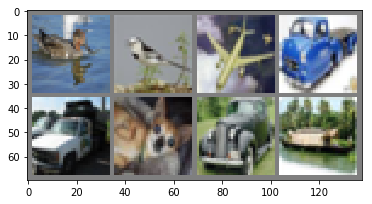

In [30]:
imshow(torchvision.utils.make_grid(image, nrow=4))

In [32]:
print(image.shape)
print(torchvision.utils.make_grid(images).shape)

torch.Size([8, 3, 32, 32])
torch.Size([3, 36, 274])


## 내 데이터셋 넣기

In [3]:
transform = transforms.Compose([transforms.Resize((100, 100)),
                                transforms.ToTensor(),
                                transforms.Normalize( (0.5,0.5,0.5), (0.5,0.5,0.5)
                                )])

trainset = torchvision.datasets.ImageFolder(root='C:/Users/swoos/Desktop/my_image',
                                           transform = transform)

In [4]:
len(trainset)   # 5장의 사진이 존재함

8

In [14]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=False, num_workers=1)

In [15]:
data_iter = iter(train_loader)
images, labels = data_iter.next()

In [16]:
print(images.shape)

torch.Size([8, 3, 100, 100])


(3, 206, 410)
(206, 410, 3)


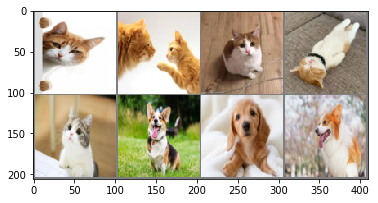

In [18]:
imshow(torchvision.utils.make_grid(images, nrow=4))

In [20]:
print(labels)

tensor([0, 0, 0, 0, 0, 1, 1, 1])
